# **Clustering**

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from datetime import datetime

In [2]:
url='https://drive.google.com/file/d/1hDBhSuAKYdCNPTsbIr6AoA2faxKQtVzj/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Timestamp scraped,Collector,Topic,Keyword,Account Handle,Account Name,Account Bio,Account Bio URLs,...,Content Type,Likes,Replies,Retweet Count,Quote Count,Reasoning,Tokenized Tweet,Clean Tweets,Stemmed Tweets,Lemmatized Tweets
0,0,0,14/06/2023 03:33:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros maute,NaN,marilyn redwood,NaN,NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['sso', 'mga', 'drug', 'addict', 'ang', 'maute...",sso drug addict maute grouppati kasama sabog g...,"['s', 's', 'o', ' ', 'd', 'r', 'u', 'g', ' ', ...",sso drug addict maute grouppati kasama sabog g...
1,1,1,14/06/2023 03:33:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros maute,@AlvinLabios1,Jeprox Ako Anong Pake Mo TV,"News, Stories and Tutorials",NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['i', 'added', 'a', 'video', 'to', 'a', 'youtu...",added video youtube playlist,"['a', 'd', 'd', 'e', 'd', ' ', 'v', 'i', 'd', ...",added video youtube playlist
2,2,2,14/06/2023 03:33:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros maute,@AlvinLabios1,Jeprox Ako Anong Pake Mo TV,"News, Stories and Tutorials",NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['i', 'added', 'a', 'video', 'to', 'a', 'youtu...",added video youtube playlist,"['a', 'd', 'd', 'e', 'd', ' ', 'v', 'i', 'd', ...",added video youtube playlist
3,3,3,14/06/2023 03:33:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros maute,@AlvinLabios1,Jeprox Ako Anong Pake Mo TV,"News, Stories and Tutorials",NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['i', 'added', 'a', 'video', 'to', 'a', 'youtu...",added video youtube playlist,"['a', 'd', 'd', 'e', 'd', ' ', 'v', 'i', 'd', ...",added video youtube playlist
4,4,4,14/06/2023 03:33:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros maute,@AlvinLabios1,Jeprox Ako Anong Pake Mo TV,"News, Stories and Tutorials",NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['i', 'added', 'a', 'video', 'to', 'a', 'youtu...",added video youtube playlist,"['a', 'd', 'd', 'e', 'd', ' ', 'v', 'i', 'd', ...",added video youtube playlist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,19,14/06/2023 04:53:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros NDF CPP,@shiningtwicexo,✌👊🚫,"Happiness, personality and productivity really...",NaN,...,To be checked,-0.169668,0.367151,-0.119726,-0.261303,Scraped,"['these', 'are', 'the', 'following', 'current'...",following current senators posibleng panigurad...,"['f', 'o', 'l', 'l', 'o', 'w', 'i', 'n', 'g', ...",following current senator posibleng panigurado...
291,291,20,14/06/2023 04:53:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros NDF CPP,@jpii041122,JPII041122,NaN,NaN,...,To be checked,-0.194985,-0.243904,-0.163169,-0.261303,Scraped,"['admarvilando', 'kabataanpl', 'risahontiveros...",admarvilando kabataanpl risahontiveros gagong ...,"['a', 'd', 'm', 'a', 'r', 'v', 'i', 'l', 'a', ...",admarvilando kabataanpl risahontiveros gagong ...
292,292,21,14/06/2023 04:53:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros NDF CPP,@jpii041122,JPII041122,NaN,NaN,...,To be checked,-0.144351,-0.243904,-0.163169,-0.261303,Scraped,"['miggypot29', 'paano', 'mapro', 'protektahan'...",miggypot29 mapro protektahan pamilyang lapid e...,"['m', 'i', 'g', 'g', 'y', 'p', 'o', 't', '2', ...",miggypot29 mapro protektahan pamilyang lapid e...
293,293,22,14/06/2023 04:53:42,Group 49,Risa Hontiveros supports rebels,risa hontiveros NDF CPP,@NationPinoy,PINOY NATION🇵🇭,Walang kinikilingan\nNOTO CPP-NDF-NPA \nNEVER ...,NaN,...,To be checked,-0.194985,-0.091140,-0.163169,-0.261303,Scraped,"['tamimi', 'si', 'risa', 'hontiveros', 'akala'...",tamimi si risa hontiveros akala nya kasing bob...,"['t', 'a', 'm', 'i', 'm', 'i', ' ', 's', 'i', ...",tamimi si risa hontiveros akala nya kasing bob...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
df1 = df
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df1['Lemmatized Tweets'])


In [9]:
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score
# find optimal number of clusters
x_axis=[]
y_axis=[]
for K in range(1,100):
  kmeans = KMeans(n_clusters=K, random_state=0)
  # fit the model
  kmeans.fit(X)

  # store cluster labels in a variable
  clusters = kmeans.labels_

  x_axis.append(K)
  y_axis.append(kmeans.inertia_)
  # print(K, kmeans.inertia_)

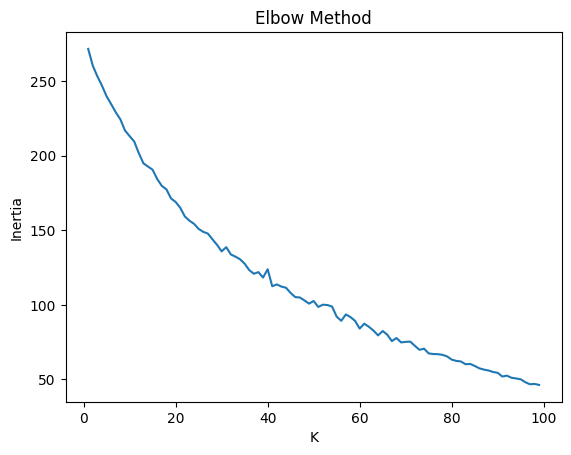

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()
plt.savefig('elbow.png')

In [39]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=35, random_state=0)
# fit the model
kmeans.fit(X)

# store cluster labels in a variable
clusters = kmeans.labels_

print(clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[24 10 10 10 10  2 22 33  8 33  7  7 10 33 21 22 32 10  7 12 15 25 30 25
 33 29 15 19 15 10 15  8  8 26  8  8 22  2  2 12 21 32 22 29  8 32 25 26
  1 23 10  7 14 14 20 24 26  7 24  2 24  8  8 29 29 20 33  7  7 18 26 19
  3  7  7 29  2 24 10 25 15 25  8 19  1 26 30 18  2 20  7  2 15 29 21 32
 25  7 29 20 14  1 14 21 30  0 14  2  2  7  2 18 20 21 20 29 21 12 33 14
  0 20 25 33 25  0 32 24 24 16 20 32  4  2 20 20  4 32 21 26 19 25 14 23
 23 16 16 16 19  2 25 30  3  2 16 16 26 26 16 19 24 26 24 26 21  4 22 29
 24 25 29  7  0 12 12 12 12 28 28 28 28 26 19 12 26 24  2  1  1  7  2 19
 29 14 14 14 14  9 17 24  3  9  9 13 13 13  5  3  9  9 13 13 13  5 21 23
 23 24 23 22 23  6 22  6  6  6 11  6  0 34  4 26 11 11 34 11 26  6  4 27
 26 22  1 29 22 31 31 31 31 26 34 31  3  3  3  3  4 31 23 26 29  4  4  4
  4  4 26 17  3 17  5  6 22  6  6  6 11  6  0 34  4 26 11 11 34 11 26  6
  4 27 26 22  1 29 22]


In [40]:
from sklearn.decomposition import PCA
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# assign clusters and pca vectors to our dataframe
df1['cluster'] = clusters
df1['x0'] = x0
df1['x1'] = x1

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df1 = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df1.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
nga,ina,yung,ba,si,group,cppnpandf,maute,kayo,naman

Cluster 1
nasa,ayaw,si,supporter,yung,maute,daw,kay,rin,eh

Cluster 2
government,galit,galing,gabriela,fake,epitome,enabler,duterte,si,maute

Cluster 3
rebel,leni,chel,diokno,enabler,npa,amp,drug,de,leila

Cluster 4
sen,one,inquirerdotnet,terror,group,opposition,senator,enabler,martial,law

Cluster 5
ina,inquirerdotnet,yung,sen,government,video,rebel,called,senate,communist

Cluster 6
sen,must,like,makabayan,bloc,si,nyo,cpp,npa,ndf

Cluster 7
senator,daw,interview,nyo,panoorin,sen,nang,invasion,maute,marawi

Cluster 8
group,watch,kay,maute,si,bumwelta,sara,duterte,spokesperson,galit

Cluster 9
galit,galing,gabriela,fake,epitome,eh,maute,ina,pangilinan,rebel

Cluster 10
group,ina,inquirerdotnet,interview,invasion,government,yung,liked,video,youtube

Cluster 11
kasama,kaalyado,leni,sison,partylist,slate,yan,rin,mo,akbayan

Cluster 12
yan,senado,maute,group,duterte,bayan,pagtaksil,kakasuhan,president,ipinagtanggol

Cluster 13

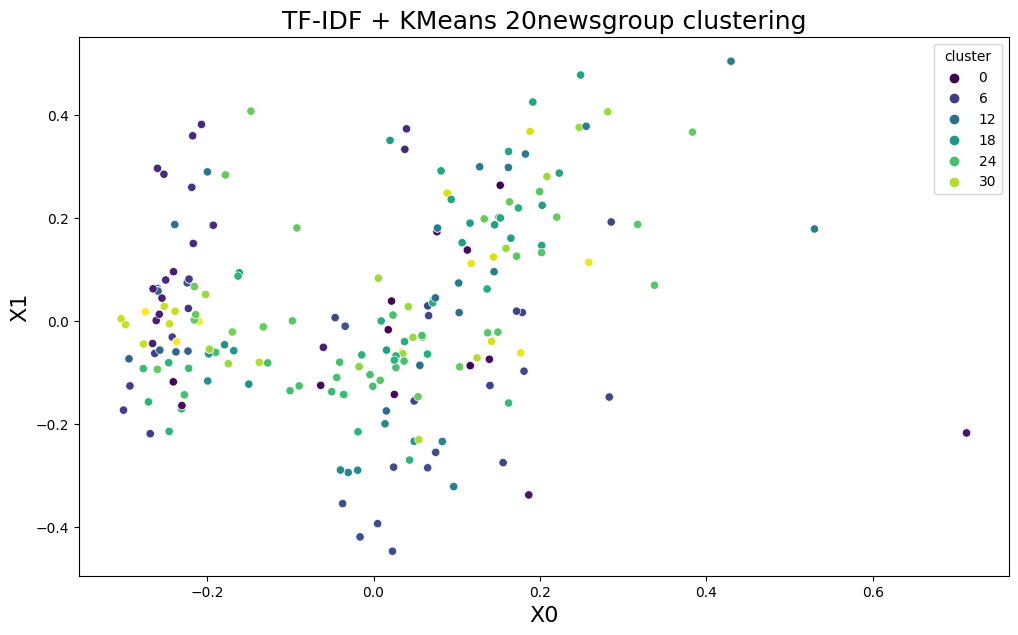

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('Related Tweets Clustering.png')
plt.show()